## Traveller Problem

In [150]:
!pip install networkx
!pip install numpy
!pip install faker
!pip install pandas
!pip install networkx matplotlib


In [151]:
import networkx as nx
import numpy as np
import random as rd
from faker import Faker
import pandas as pd
import matplotlib.pyplot as plt

In [152]:
faker = Faker()
rd.seed = 10

In [153]:
NUM_CITIES = 10
NUM_CONECTIONS = 25

In [154]:
class City:
    def __init__(self, position:np.array, name = 'Default'):
        self.name = name
        self.position = position
        self.color = faker.color()
    
    def getJsonStyle(self):
        return {
            'color': self.color
        }
    


In [155]:
#---------------- Creating 10 random cities --------------#

random_cities = [City(position=np.array([rd.randint(0,100), rd.randint(0,100)]), name =str(faker.city())) for i in range(NUM_CITIES)]

data_frame = pd.DataFrame(
    data = {
        'name': [city.name for city in random_cities],
        'position': [city.position for city in random_cities],
        'color': [city.color for city in random_cities]
    }
)

data_frame.head()


,name,position,color
0,East Joshua,"[41, 65]",#bdf455
1,West Markmouth,"[61, 43]",#00dd07
2,Patriciaburgh,"[78, 32]",#a01930
3,Tammybury,"[24, 78]",#672ac1
4,Robinsonland,"[24, 31]",#7a99ff


In [156]:
#------------- Creating networks -------------#

def getRandomUnion(list_obj: list, no_list: list):
    max_iter = 1000
    count = 0
    while(True):
        sample1 = rd.sample(list_obj, 2)
        sample2 = rd.sample([obj for obj in list_obj if obj != sample1], 1)
        union = [sample1, sample2]
        count+=1
        if(not union in no_list):
            return union
        if(count > max_iter):
            print('Upon max iteration')
            break


#1) Creating the random net between the cities
random_net = []
random_net = [rd.sample(random_cities, 2) for i in range(NUM_CONECTIONS)]
random_net


[[<__main__.City at 0x714bbdba8680>, <__main__.City at 0x714bbdba8e90>],
 [<__main__.City at 0x714bbdba8e90>, <__main__.City at 0x714bbdba8d70>],
 [<__main__.City at 0x714bbdaae1b0>, <__main__.City at 0x714bbdc8f3e0>],
 [<__main__.City at 0x714bbdaae1b0>, <__main__.City at 0x714bbdba9f10>],
 [<__main__.City at 0x714bbdba8500>, <__main__.City at 0x714bbdc8f3e0>],
 [<__main__.City at 0x714bbdbaa060>, <__main__.City at 0x714bbdba9f10>],
 [<__main__.City at 0x714bc07cd520>, <__main__.City at 0x714bbdba8d70>],
 [<__main__.City at 0x714bbdaae1b0>, <__main__.City at 0x714bbdba8500>],
 [<__main__.City at 0x714bbedc6ab0>, <__main__.City at 0x714bbdbaa060>],
 [<__main__.City at 0x714bbedc6ab0>, <__main__.City at 0x714bbdaae1b0>],
 [<__main__.City at 0x714bbedc6ab0>, <__main__.City at 0x714bbdba8e90>],
 [<__main__.City at 0x714bbdc8f3e0>, <__main__.City at 0x714bbdba8d70>],
 [<__main__.City at 0x714bbdc8f3e0>, <__main__.City at 0x714bbdba8500>],
 [<__main__.City at 0x714bbdba8e90>, <__main__.City

In [179]:
# Creating the grapth

G = nx.Graph()
G.add_nodes_from([(city, city.getJsonStyle()) for city in random_cities])
G.add_edges_from(random_net)
nx.set_edge_attributes(
    G,
    {
        edge: np.linalg.norm(
            edge[0].position-edge[1].position
        ).round()
        for edge in list(G.edges())
    },
    'distance'
)

In [180]:
#------------Visualization----------
node_labels = {node: node.name for node in G.nodes()}
edge_labels = nx.get_edge_attributes(G, "distance")
node_colors = [node.color for node in G.nodes()]
pos = nx.spring_layout(G, scale = 100, seed= 5)
label_pos = {node: pos[node] + np.array([0,6]) for node in pos}

[]

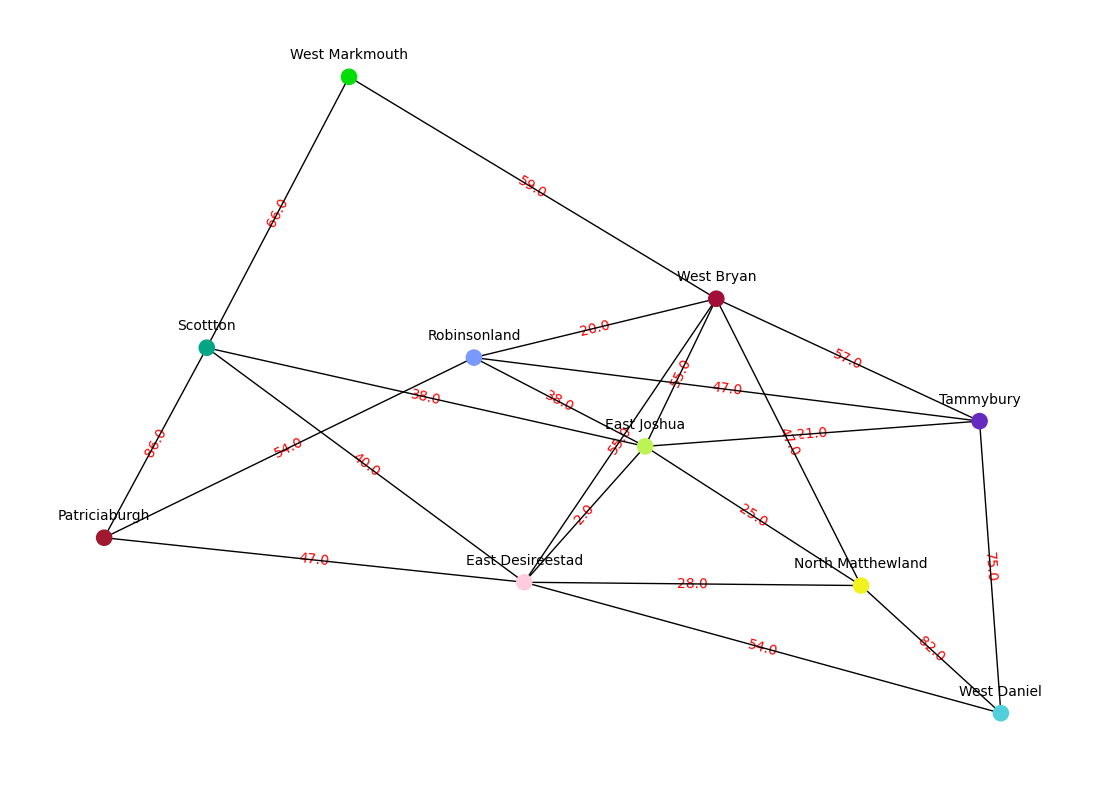

In [183]:
plt.figure(figsize=(14,10))

nx.draw_networkx_labels(G, label_pos, labels=node_labels, font_size=10, font_color="black")
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, label_pos=0.5, font_size=10, font_color="red")
nx.draw(G, pos,  with_labels = False, node_color = node_colors, node_size = 120,)
plt.plot()